# EXPLORE SALES TO OPTIMISE PROFIT RATIOS¶

<div class="alert alert-block alert-info">
The perspective taken is to look at impacts of categories on profit ratios
</div>

In [341]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import math

# Read Data Set

In [342]:
sales_df = pd.read_csv('C:\\Users\\nxa19765\\Documents\\data\\TBS\\projects\\python\\sales.csv')

# Exploratory Data Analysis (EDA)
> Let's explore Data Set by displaying columns names & first rows to see what the data looks like.

In [343]:
print(sales_df.columns)
sales_df.head()

Index(['Order ID', 'Order Date', 'Order Year', 'Order Quarter', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


,Order ID,Order Date,Order Year,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2018-138688,12/06/2018,2018,4,16/06/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Find out unique element per columns
> Find out how many unique element per columns, because "groupby" makes sense only if there are a limited number of unique elements.

In [344]:
sales_df.nunique()

Order ID         5009
Order Date       1236
Order Year          4
Order Quarter       4
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       630
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

# Compute profitability indicator
> Profit is the KPI that we want to optimise so let's look at profit ratio.
For a single sale, the profit ratio is defined as the ratio between the amount of profit and the amount of sale.

In [345]:
sales_df['profit ratio'] = sales_df['Profit'] / sales_df['Sales']
sales_df[['Profit','Sales','profit ratio']].head()

,Profit,Sales,profit ratio
0,41.9136,261.9600,0.1600
1,219.5820,731.9400,0.3000
2,6.8714,14.6200,0.4700
3,-383.0310,957.5775,-0.4000
4,2.5164,22.3680,0.1125


> Plot distribution of profit ratio of all sales to get a general feeling.

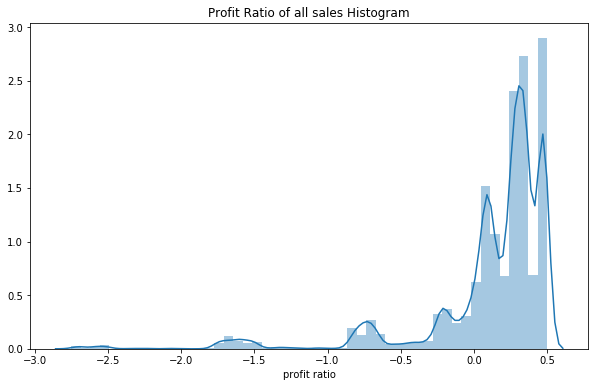

In [346]:
plt.figure( figsize = (10, 6) )
chart=sb.distplot(sales_df['profit ratio'], hist=True)
chart.set_title('Profit Ratio of all sales Histogram')
plt.show()

# Profit ratio per category
> We want to see if all categories are consistently profitable or if some should be optimized.

In [347]:
profit_ratio_per_category = sales_df.groupby('Category').Profit.sum() / sales_df.groupby('Category').Sales.sum()
profit_ratio_per_category

Category
Furniture          0.024867
Office Supplies    0.170352
Technology         0.173957
dtype: float64

> We want also want to see the volume of profit and sales to make sure that furniture represent a large enough volume to be interesting to be optimized.

,Profit,Sales,Profit %,Sales %,Category,x_label
Category,,,,,,
Furniture,18451.2728,741999.7953,6.4,32.3,Furniture,Category
Office Supplies,122490.8008,719047.0320,42.8,31.3,Office Supplies,Category
Technology,145454.9481,836154.0330,50.8,36.4,Technology,Category


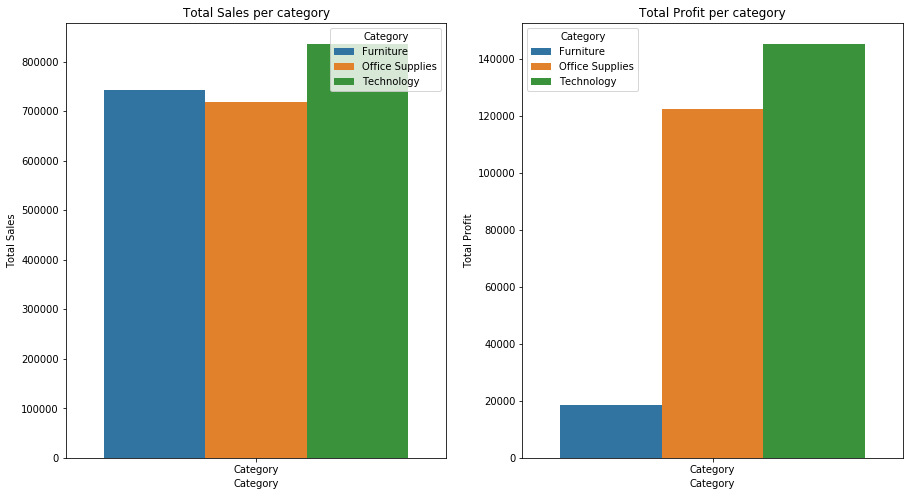

In [348]:
# df computes volumes of profit and sales
df = sales_df.groupby('Category')['Profit','Sales'].sum()
# compute and append profit per category in %
df['Profit %'] = round(100*sales_df.groupby('Category')['Profit'].sum() / sum(sales_df.groupby('Category')['Profit'].sum()),1)
# compute and append sales per category in %
df['Sales %']  = round(100*sales_df.groupby('Category')['Sales'].sum() / sum(sales_df.groupby('Category')['Sales'].sum()),1)
df['Category'] = sales_df['Category'].unique()
df['x_label'] = 'Category'

plt.figure( figsize = (15, 8) )

plt.subplot(1,2,1)
chart=sb.barplot(data=df, x='x_label', hue='Category', y='Sales', ci=None)
chart.set_title('Total Sales per category')
chart.set_xlabel('Category')
chart.set_ylabel('Total Sales')

plt.subplot(1,2,2)
chart=sb.barplot(data=df, x='x_label', hue='Category', y='Profit', ci=None)
chart.set_title('Total Profit per category')
chart.set_xlabel('Category')
chart.set_ylabel('Total Profit')

df

> Furniture sales volume is comparable between all categories while total profit is way lower with points out to a big problem.

# Boxplot per Category
> Plot profit category per category with box plots to see median and distribution

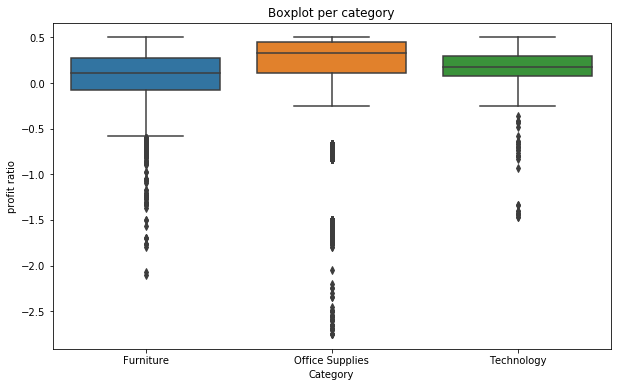

In [349]:
plt.figure( figsize = (10, 6) )
chart=sb.boxplot(data=sales_df, x='Category', y='profit ratio')
chart.set_title('Boxplot per category')
plt.show()

## Finding#1 Furniture profit ratio is much lower than others categories
> Furniture profit is very low compare to others categories, let's try to understand what/where is the issue: some specific products, some geographic factors, some temporal factors etc....

# Look at products inside categories

> To do the analysis of furniture we'll compare Furniture profits to other categories so first we need to select each category independently.

In [350]:
# furniture items
furniture_df = sales_df[sales_df.Category == 'Furniture']
#furniture_df.head()

# office supplies items
office_supplies_df = sales_df[sales_df.Category == 'Office Supplies']
#office_supplies_df.head()

# technology items
technology_df = sales_df[sales_df.Category == 'Technology']
#technology_df.head()


> Then we compute profit ratio for each category taking the sum.

In [351]:
profit_ratio_per_product_furniture       = furniture_df.groupby('Product Name').Profit.sum()       / furniture_df.groupby('Product Name').Sales.sum()
profit_ratio_per_product_office_supplies = office_supplies_df.groupby('Product Name').Profit.sum() / office_supplies_df.groupby('Product Name').Sales.sum()
profit_ratio_per_product_technology      = technology_df.groupby('Product Name').Profit.sum()      / technology_df.groupby('Product Name').Sales.sum()

product_profit_max                       = math.ceil(max([profit_ratio_per_product_furniture.max(),profit_ratio_per_product_office_supplies.max(),profit_ratio_per_product_technology.max()]))
product_profit_min                       = math.floor(min([profit_ratio_per_product_furniture.min(),profit_ratio_per_product_office_supplies.min(),profit_ratio_per_product_technology.min()]))


# Profit ratios per product
> Plot profit ratios per product of all categories 

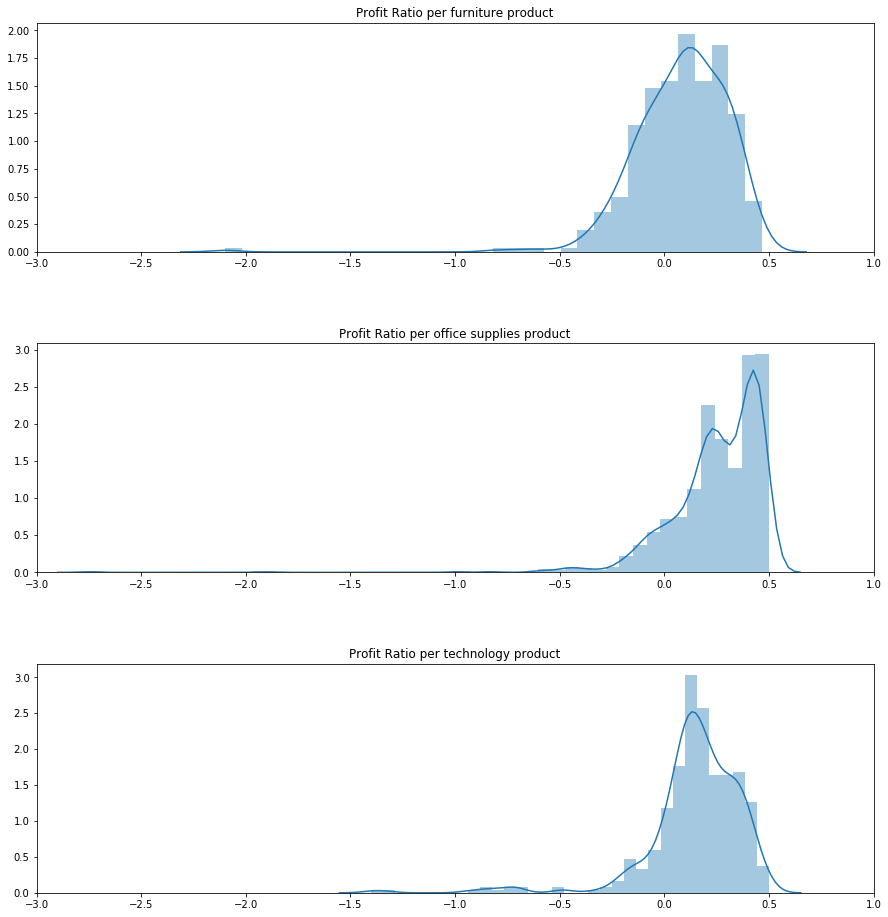

In [352]:
#plt.hist(profit_ratio_per_product_furniture, normed=True, bins=100)
plt.figure( figsize = (15, 16) )

plt.subplot(3,1,1)
chart=sb.distplot(profit_ratio_per_product_furniture, hist=True)
chart.set_title('Profit Ratio per furniture product')
plt.xlim(-3, 1)

plt.subplot(3,1,2)
chart=sb.distplot(profit_ratio_per_product_office_supplies, hist=True)
chart.set_title('Profit Ratio per office supplies product')
plt.xlim(-3, 1)

plt.subplot(3,1,3)
chart=sb.distplot(profit_ratio_per_product_technology, hist=True)
chart.set_title('Profit Ratio per technology product')
plt.xlim(product_profit_min, product_profit_max)

plt.subplots_adjust(hspace=0.4)


plt.show()

## Finding#2 Furniture profit ratio doesn't look great per product, many products have negative profit ratio
## Finding#3 Technology profit ratio exhibits some outliers that have negative profit ratios, those can be improved



In [353]:
profit_ratio_per_region_furniture = furniture_df.groupby('Region').Profit.sum() / furniture_df.groupby('Region').Sales.sum()
profit_ratio_per_region_furniture

Region
Central   -0.017528
East       0.014625
South      0.057726
West       0.045544
dtype: float64

## Finding#4 Furniture profit ratio is much worse on Central and East Regions than South and West


In [354]:
profit_ratio_per_year_furniture = furniture_df.groupby('Order Year').Profit.sum() / furniture_df.groupby('Order Year').Sales.sum()
profit_ratio_per_year_furniture

Order Year
2016    0.034720
2017    0.017683
2018    0.034992
2019    0.014014
dtype: float64

Text(0.5, 1.0, 'Profit Ratio per year for furniture')

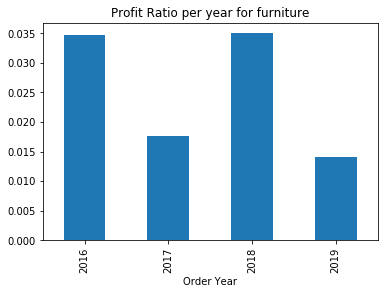

In [355]:
chart=profit_ratio_per_year_furniture.plot.bar()
chart.set_title('Profit Ratio per year for furniture')


> Profit are better on even years than odd years.

In [356]:
profit_ratio_per_quarter_furniture = furniture_df.groupby('Order Quarter').Profit.sum() / furniture_df.groupby('Order Quarter').Sales.sum()
profit_ratio_per_quarter_furniture

Order Quarter
1    0.006939
2    0.032284
3    0.044302
4    0.015687
dtype: float64

Text(0.5, 1.0, 'Profit Ratio per quarter for furniture')

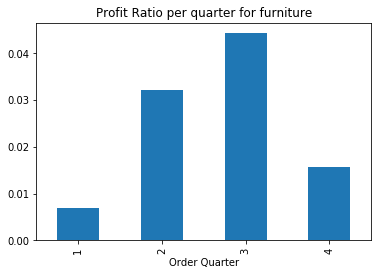

In [357]:
chart=profit_ratio_per_quarter_furniture.plot.bar()
chart.set_title('Profit Ratio per quarter for furniture')


## Finding#5 Furniture profit ratio is really bad in Q1 and not great in Q4


# Recommendations

1. **<font size="4"><font color='green'>Focus on furnitures**
2. **<font size="4"><font color='green'>Inside Furnitures, set the focus on the products with negative profit ratios**
3. **<font size="4"><font color='green'>Inside Furnitures, set the focus on Tables and Bookcases sub-categories**
4. **<font size="4"><font color='green'>Inside Furnitures, set the focus on central region first, east second**
5. **<font size="4"><font color='green'>Understand why Q1 & Q4 are worse than Q2 & Q3 for furnitures**
